# Image Processing 1 - Instagram Filters


### اماني عبدالحميد عبدالرحمن طه ابراهيم        1300308
### Email: amanyabdo1194@gmail.com

# 1- Documentation

   - This assignment implemented in Python 3. [Python 2 and 3 have some differences for some functions, ex: print()]. 
   - Here, I use two images: one for Input (that will be filtered) and another one for Overlay (used for overlaying the input image to build some filters).
   - Libraries used: cv2 , numpy , matplotlib.pyplot.
   - I have implemented three functions: 
        - im2double : to convert pixel values of the image to double, so we can use double (small values, ex: 0.1,0.85,...).
        - channel_adjust : to adjust channels' values (RGB) by flattening and interpolating the image . 
        - insta_like : this is the required function.
   - I implemented 6 filters: Gotham, Toaster, 1977, Sutro, Inkwell and Lily.  
   - For Inkwell, We must imshow output image as gray using -> imshow(out, cmap='gray').
   - Steps :
       - read the image using cv2 library.
       - convert the input image to RGB or GRAY according to the type of filter.
       - convert the converted image ro double.
       - split red, green, and blue channels.
       - adjust channels values using interpolation(channel_adjust function).
       - merge the channels again.
       - blurring the image if needed (not a must).
       - return the output.
        

# 2- Script

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def im2double(im):
    min_val = np.min(im.ravel())            #im.ravel() returns image values as one 1-D array
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)   #get percentage of each value (converting to double)
    return out

def channel_adjust(channel, values):
    orig_size = channel.shape
    flat_channel = channel.flatten()          #returns image as one 1-D array 
    adjusted = np.interp(flat_channel, np.linspace(0, 1, len(values)), values)   #interpolating the channel pixels-> 
                                                                                #->to adjust their values
    return adjusted.reshape(orig_size)

In [3]:
imgOverlay=cv2.imread("Overlay.jpg",0)         #read imageOverlay to be used in Toaster and Sutro filters

def insta_like(image , instafilter):
    
    if instafilter == "Gotham":
        imgOrg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   #opencv read images in BGR so we need to convert it to RGB
        imgDL=im2double(imgOrg)                           #convert the image to double
        r,g,b=cv2.split(imgDL)                            #splitting channels to red,green,blue
        r_boost_lower = channel_adjust(r, [ 0, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 1.0]) 
                                                          #adjust red channel and decrease its effect on the image
        b_more = np.clip(b + 0.03, 0, 1.0)                #clipping(threshold the blue channel)to get it darker
        merged = cv2.merge([r_boost_lower, imgDL[:, :, 1], b_more])  
                                                          #merge [r_adjusted, g, b_adjusted] again
        blurred = cv2.GaussianBlur(merged,(25,25),0)     #blurring the merged_image using gaussian kernal of size 25x25 
        out = np.clip(merged * 1.3 - blurred * 0.3, 0, 1.0) #clipping the new image
        b = out[:, :, 2]
        b_adjusted = channel_adjust(b, [0, 0.047, 0.118, 0.251, 0.318, 0.392, 0.42, 0.439, 0.475,
                                         0.561, 0.58, 0.627, 0.671, 0.733, 0.847, 0.925, 1])
        out[:, :, 2] = b_adjusted
        return out
    
    elif instafilter == "1977":
        imgOrg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   
        imgDL=im2double(imgOrg)
        r,g,b=cv2.split(imgDL)
        g_boost_lower = channel_adjust(g, [ 0, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 1.0])
        b_boost_lower = channel_adjust(b, [ 0, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 1.0])
        r_more = np.clip(r + 0.2, 0, 1.0)
        merged = cv2.merge([r_more, g_boost_lower, b_boost_lower])
        out = merged
        return out
    
    elif instafilter == "Lily":
        imgOrg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   
        imgDL=im2double(imgOrg)
        r,g,b=cv2.split(imgDL)
        b_boost_lower = channel_adjust(b, [ 0, 0.01, 0.01, 0.02, 0.05, 0.07, 0.08, 0.09, 1.0])
        merged = cv2.merge([r, g, b_boost_lower])
        blurred = cv2.GaussianBlur(merged,(3,3),0)
        out = blurred
        return blurred
    
    elif instafilter == "Inkwell":
        imgOrg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(imgOrg,(3,3),0)
        out = blurred
        return out
    
    elif instafilter == "Toaster":
        imgOrg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   
        imgDL=im2double(imgOrg)
        imgOverlayConverted = cv2.cvtColor(imgOverlay, cv2.COLOR_GRAY2RGB)  #convert to RGB to match input image in size  
        OverLayDL=im2double(imgOverlayConverted)                       #double the overlay image to be added to input image
        img=cv2.addWeighted(imgDL,1,OverLayDL,0.4,0)         #add input and overlay images scaled by 0.4 to be darker
        r,g,b=cv2.split(img)
        r_more = np.clip(r + 0.3, 0, 1.0)
        b_boost_lower = channel_adjust(b, [  0, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 1.0])
        g_boost_lower = channel_adjust(g, [ 0, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 1.0])
        merged = cv2.merge([r_more, g_boost_lower, b_boost_lower])
        blurred = cv2.GaussianBlur(merged,(5,5),0)
        out = blurred
        return out
    
    elif instafilter == "Sutro":
        imgOrg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   
        imgDL=im2double(imgOrg)
        imgOverlayConverted = cv2.cvtColor(imgOverlay, cv2.COLOR_GRAY2RGB)   
        OverLayDL=im2double(imgOverlayConverted)                   
        img=cv2.addWeighted(imgDL,1,OverLayDL,0.4,0)
        r,g,b=cv2.split(img)
        r_boost_lower = channel_adjust(r, [ 0, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 1.0])
        b_boost_lower = channel_adjust(b, [ 0, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 1.0])
        g_more = np.clip(g + 0.1, 0, 1.0)
        merged = cv2.merge([r_boost_lower, g_more, b_boost_lower])
        blurred = cv2.GaussianBlur(merged,(25,25),0)
        out = np.clip(merged * 1.3 - blurred * 0.3, 0, 1.0)
        g = out[:, :, 1]
        g_adjusted = channel_adjust(g, [0, 0.047, 0.118, 0.251, 0.318, 0.392, 0.42, 0.439, 0.475,
                                        0.561, 0.58, 0.627, 0.671, 0.733, 0.847, 0.925, 1])
        out[:, :, 1] = g_adjusted
        return out
    

# 2.0 Input image

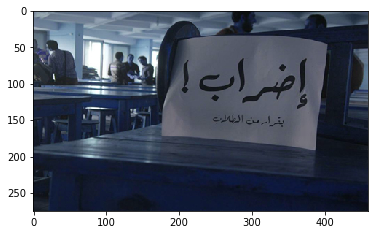

In [4]:
image = cv2.imread('input.jpg',1)
plt.imshow(image)
plt.show()

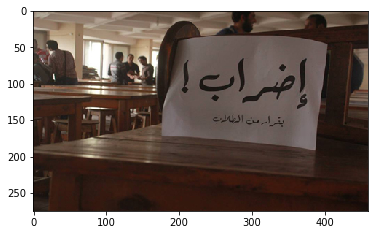

In [5]:
#here the original image in RGB to compare with filters output
#When we call insta_like function, we will give it image not the original image 
Original_image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
plt.imshow(Original_image)
plt.show()

# 2.1 Gotham Filter

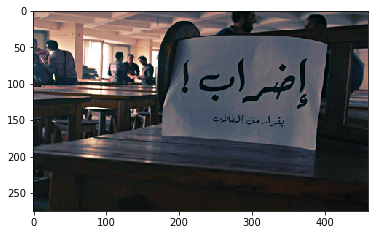

In [6]:
output_gotham = insta_like(image , "Gotham")
plt.imshow(output_gotham)
plt.show()

# 2.2   1977 Filter

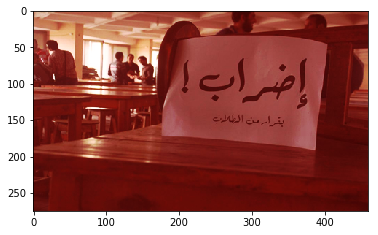

In [7]:
output_1977 = insta_like(image , "1977")
plt.imshow(output_1977)
plt.show()

# 2.3 Lily Filter

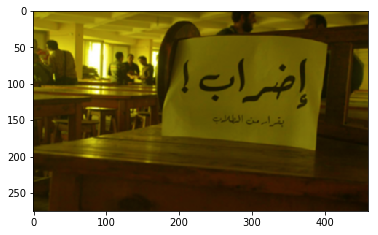

In [8]:
output_lily = insta_like(image , "Lily")
plt.imshow(output_lily)
plt.show()

# 2.4 Inkwell Filter

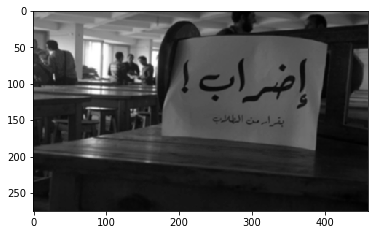

In [9]:
output_inkwell = insta_like(image , "Inkwell")
plt.imshow(output_inkwell , cmap='gray')   
plt.show()

# 2.5 Toaster Filter

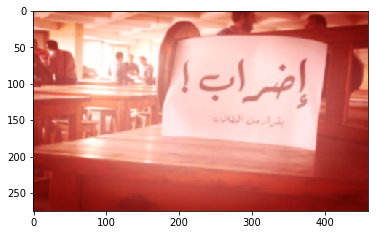

In [10]:
output_toaster = insta_like(image , "Toaster")
plt.imshow(output_toaster)
plt.show()

# 2.6 Sutro Filter

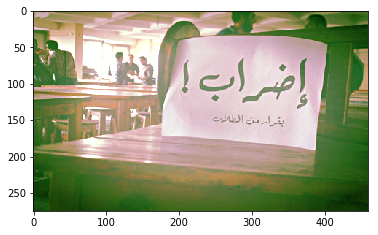

In [11]:
output_sutro = insta_like(image , "Sutro")
plt.imshow(output_sutro)
plt.show()

#                                                   The End
                                              Thank You